# LAB 7B - CLUSTERING

This lab is comprise of 2 main sections:

 - 1. K-Means Clustering
 
 - 2. Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airline = pd.read_csv("airline.csv")
airline.info()
airline.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Balance          3999 non-null   int64
 1   BonusMiles       3999 non-null   int64
 2   BonusTrans       3999 non-null   int64
 3   FlightMiles      3999 non-null   int64
 4   FlightTrans      3999 non-null   int64
 5   DaysSinceEnroll  3999 non-null   int64
dtypes: int64(6)
memory usage: 187.6 KB


,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
0,48296,31329,9,500,1,3061
1,10021,0,0,0,0,7879
2,49280,22370,16,0,0,3312
3,213539,2750,15,0,0,4751
4,125465,14750,9,0,0,7206


In [3]:
airline.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,263685.000000,86.00000,30817.000000,53.000000,8296.00000


We need to preprocess the data so that we treat each column equally to compute the clusters.

We use the `preprocessing` function from `sklearn` that does all the work for us

### Pre-processing

First, center the data (substract the mean to each column)
=> mean becomes 0 for each column

Then, scale the data, by dividing by the standard deviation
=> std becomes 1 for each column

https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
airline_scaled = scaler.fit_transform(airline)

airline_scaled = pd.DataFrame(airline_scaled, columns=airline.columns)
airline_scaled.describe()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.487521e-17,-4.175482e-17,-7.640244e-17,-2.665202e-18,1.510281e-17,6.174384e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-7.099918e-01,-1.208203e+00,-3.286033e-01,-3.621679e-01,-1.993611e+00
25%,-5.465676e-01,-6.582276e-01,-8.957878e-01,-3.286033e-01,-3.621679e-01,-8.661823e-01
50%,-3.027332e-01,-4.130308e-01,4.145743e-02,-3.286033e-01,-3.621679e-01,-1.092530e-02
75%,1.866028e-01,2.756198e-01,5.621492e-01,-1.064658e-01,-9.850333e-02,8.097050e-01
max,1.618884e+01,1.020957e+01,7.747696e+00,2.168300e+01,1.361205e+01,2.023095e+00


In [5]:
# What does a negative value represent?



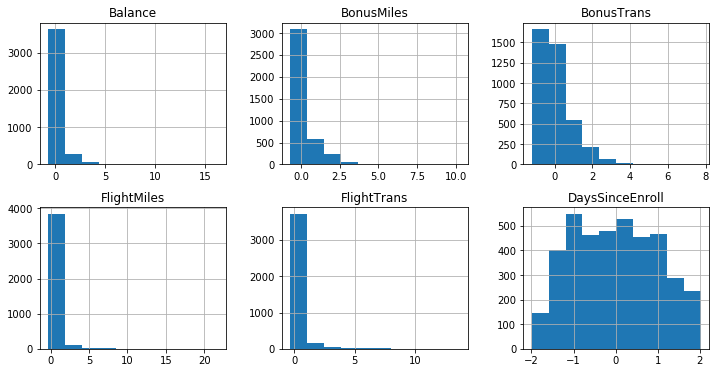

In [6]:
airline_scaled.hist(figsize=(12,6), layout=(2,3))
plt.show()

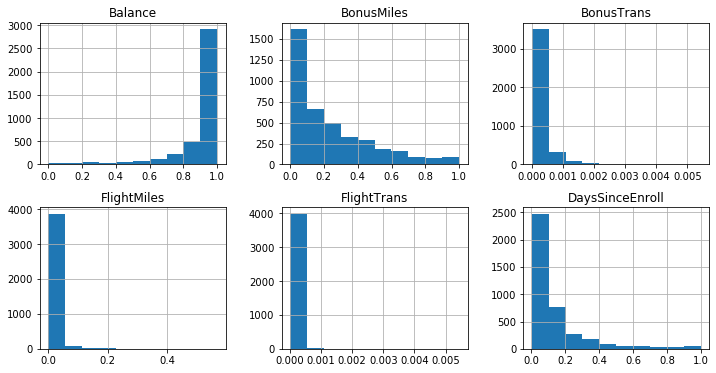

In [7]:
airline_normalized = preprocessing.normalize(airline)
airline_normalized = pd.DataFrame(airline_normalized, columns=airline.columns)

airline_normalized.hist(figsize=(12,6), layout=(2,3))
plt.show()

## K-Means Clustering 

We can select 'k' using the `n_clusters` parameter in `sklearn`s package `KMeans`.

We can set an upper bound to the number of iterations of the algorithm with `max_iter`.

In [8]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100, random_state=88)
kmeans.fit(airline_scaled)

KMeans(max_iter=100, random_state=88)

Let's explore the results!

How good is the clustering? 

In [9]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

8147.433362829322

In [10]:
# Number of iterations
kmeans.n_iter_

34

In [11]:
# Cluster for each datapoint
kmeans.labels_

array([7, 3, 7, ..., 0, 1, 4], dtype=int32)

In [12]:
# Cluster centroids
kmeans.cluster_centers_

array([[ 0.32096733,  0.21675139,  0.46144572, -0.17469075, -0.19297983,
         1.01838517],
       [-0.41452407, -0.60824775, -0.86068015, -0.23595667, -0.24383239,
        -1.01902782],
       [ 5.98854399,  2.09080064,  1.11453531,  0.80023571,  1.10518261,
         1.16961704],
       [-0.35735787, -0.57943943, -0.74226545, -0.21801418, -0.22915325,
         0.69937197],
       [ 0.75217077,  2.26445635,  1.13123866, -0.07868718, -0.05117893,
         0.50451502],
       [ 0.76871189,  0.86170063,  2.49449435,  5.83805875,  6.07319995,
         0.15280077],
       [ 0.41031906,  0.15936003,  0.83271876,  1.88467944,  1.92894454,
         0.02161725],
       [-0.16151761,  0.09066922,  0.55262589, -0.23883958, -0.25695257,
        -0.64358585]])

If we would like to know the number of observations that belong to each cluster, we can easily calculate that:

In [13]:
kmeans_size = []
clusters = np.unique(kmeans.labels_)
for cluster in clusters:
    kmeans_size.append(len(np.where(kmeans.labels_ == cluster)[0]))

kmeans_size                       

[668, 964, 46, 891, 313, 54, 219, 844]

### Scree Plot (selecting the value of K)

To creat the plot we need to compute the cluster dissimilarity for different values of k

In [14]:
wcss = []
for k in range(1, 100):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100, random_state=88)
    kmeans.fit(airline_scaled)
    wcss.append(kmeans.inertia_)

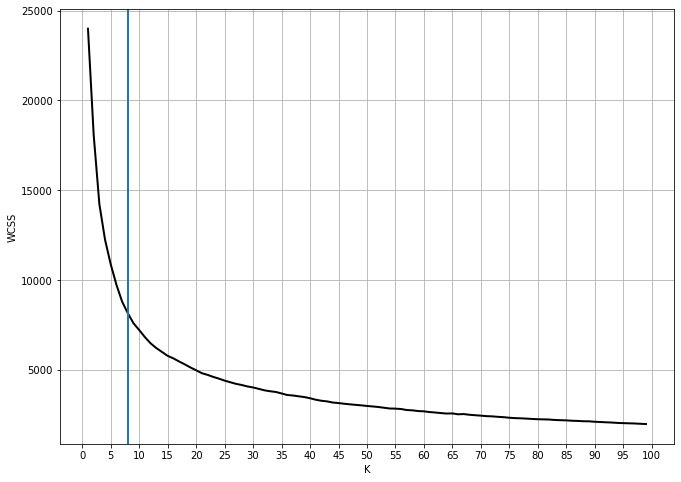

In [15]:
plt.figure(figsize=(11,8))
plt.plot(range(1, 100), wcss, linewidth=2, color='black')
plt.axvline(x=8, linewidth=2)
plt.xticks(np.linspace(0,100,21))
plt.xlabel('K')
plt.ylabel('WCSS')
plt.grid(axis='both')
plt.show()

***Was k = 8 a good choice ?***

Remember that we are looking for a "knee" in the curve / a place where rocks stop falling

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

## Hierarchical Agglomerative Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',
                                        distance_threshold=0)
agglomerative.fit(airline_scaled)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

https://en.wikipedia.org/wiki/Ward%27s_method

We do not choose a number of clusters a priori, instead we let the algorithm build up from clusters comprised from single datapoints up to bigger and bigger clusters, as will be illustrated in the dendrogram. The argument `distance_threshold` is used to calibrate the number of clusters. The threshold refers to the dissimilarity metric, or "distance". 

Setting `distance_threshold` to 0 and calling the method `n_clusters_` yields value equal to the number of datapoints.

In [17]:
agglomerative.n_clusters_

3999

In [18]:
agglomerative.labels_

array([3065, 3904, 2863, ...,    3,    1,    0])

In [19]:
agglomerative.distances_

array([0.00000000e+00, 1.88561158e-03, 2.26431613e-03, ...,
       6.34860857e+01, 8.25114951e+01, 1.00751847e+02])

In [20]:
agglomerative.children_

array([[2021, 2695],
       [ 272, 3155],
       [ 621, 1478],
       ...,
       [7984, 7991],
       [7989, 7993],
       [7994, 7995]])

### Plot Dendrogram

In [21]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    
    dendrogram(linkage_matrix, **kwargs)    

We can choose to truncate our dendrogram use the `truncate_mode='level'`, according to how many levels we wish to plot. For example we can display all 3999 datapoints setting 11 levels, `p=11`, as the 11 levels correspond to `2**11 = 2048` clusters/pairs.

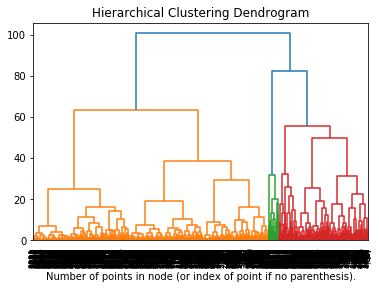

In [22]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=11, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

If we want to show 2 levels below level '0', we set `p = 2`

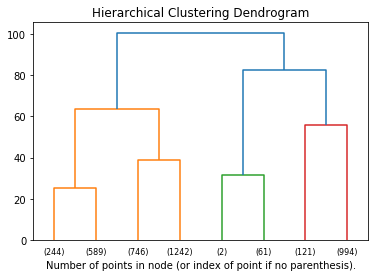

In [23]:
plt.title("Hierarchical Clustering Dendrogram")
plot_dendrogram(agglomerative, truncate_mode='level', p=2, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Reference for plot code:
https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py]

For `AgglomerativeClustering` in `sklearn`, we must set one of either `n_clusters`, or `distance_threshold`. In order to have the attribute `distances_`, which corresponds to our measure of dissimilarity, and allows us to plot our scree plot, we must go with the `distance_threshold` rather than `n_clusters`.

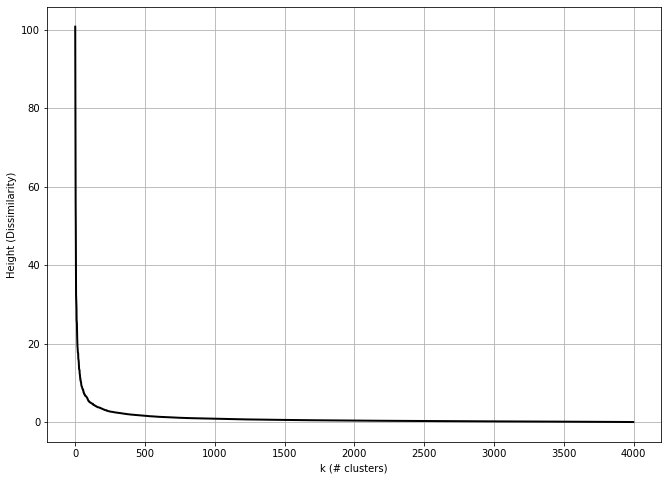

In [24]:
reversed_distances = agglomerative.distances_[::-1]
plt.figure(figsize=(11,8))
plt.plot(reversed_distances, linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height (Dissimilarity)')
plt.grid(axis='both')
plt.show()

Let's zoom on the smallest k values:

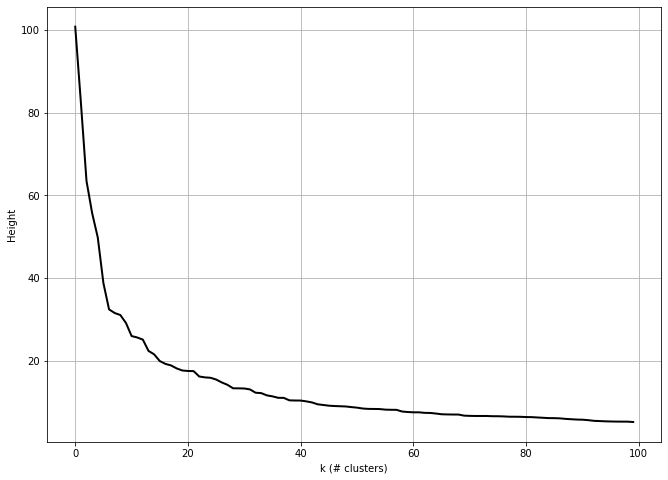

In [25]:
plt.figure(figsize=(11,8))
plt.plot(reversed_distances[:100], linewidth=2, color='black')
plt.xlabel('k (# clusters)')
plt.ylabel('Height')
plt.grid(axis='both')
plt.show()

In [26]:
# What would be a "good" k value ?



After visual inspection of the dendrogram and scree plot, we can now construct the clusters with our selected `k`. We can refit an agglomerative object with the desired parameter. We can make use of `n_clusters`, or also use `distance_threshold`.

In [27]:
new_agglomerative = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward',
                                            distance_threshold=None)
new_agglomerative.fit(airline_scaled)

AgglomerativeClustering(n_clusters=5)

Finally, we can access the centroids of each group using pandas

In [28]:
new_airline_scaled = airline_scaled.copy()
new_airline_scaled['Cluster'] = new_agglomerative.labels_
new_airline_scaled.head()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll,Cluster
0,-0.251137,0.587385,-0.270958,0.028531,-0.098503,-0.512166,1
1,-0.630988,-0.709992,-1.208203,-0.328603,-0.362168,1.821146,3
2,-0.241371,0.216381,0.458011,-0.328603,-0.362168,-0.390609,1
3,1.388779,-0.596111,0.353873,-0.328603,-0.362168,0.306285,0
4,0.514709,-0.099174,-0.270958,-0.328603,-0.362168,1.495218,3


In [29]:
# Cluster Centroids

new_airline_scaled.groupby(['Cluster']).mean()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,
0,0.267181,0.925793,0.887870,0.233284,0.250308,0.129849
1,-0.352499,-0.463723,-0.483425,-0.246188,-0.261371,-0.619749
2,0.666945,0.870265,2.350684,5.495552,5.589117,0.144824
3,-0.085198,-0.288275,-0.195698,-0.211341,-0.228595,1.181821
4,3.835898,1.545034,0.772147,0.722032,0.901679,0.904220


In [30]:
# Cluster Size

new_airline_scaled.groupby(['Cluster']).count()

,Balance,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,
0,994,994,994,994,994,994
1,1988,1988,1988,1988,1988,1988
2,63,63,63,63,63,63
3,833,833,833,833,833,833
4,121,121,121,121,121,121


Finally, let's plot them with color maps.

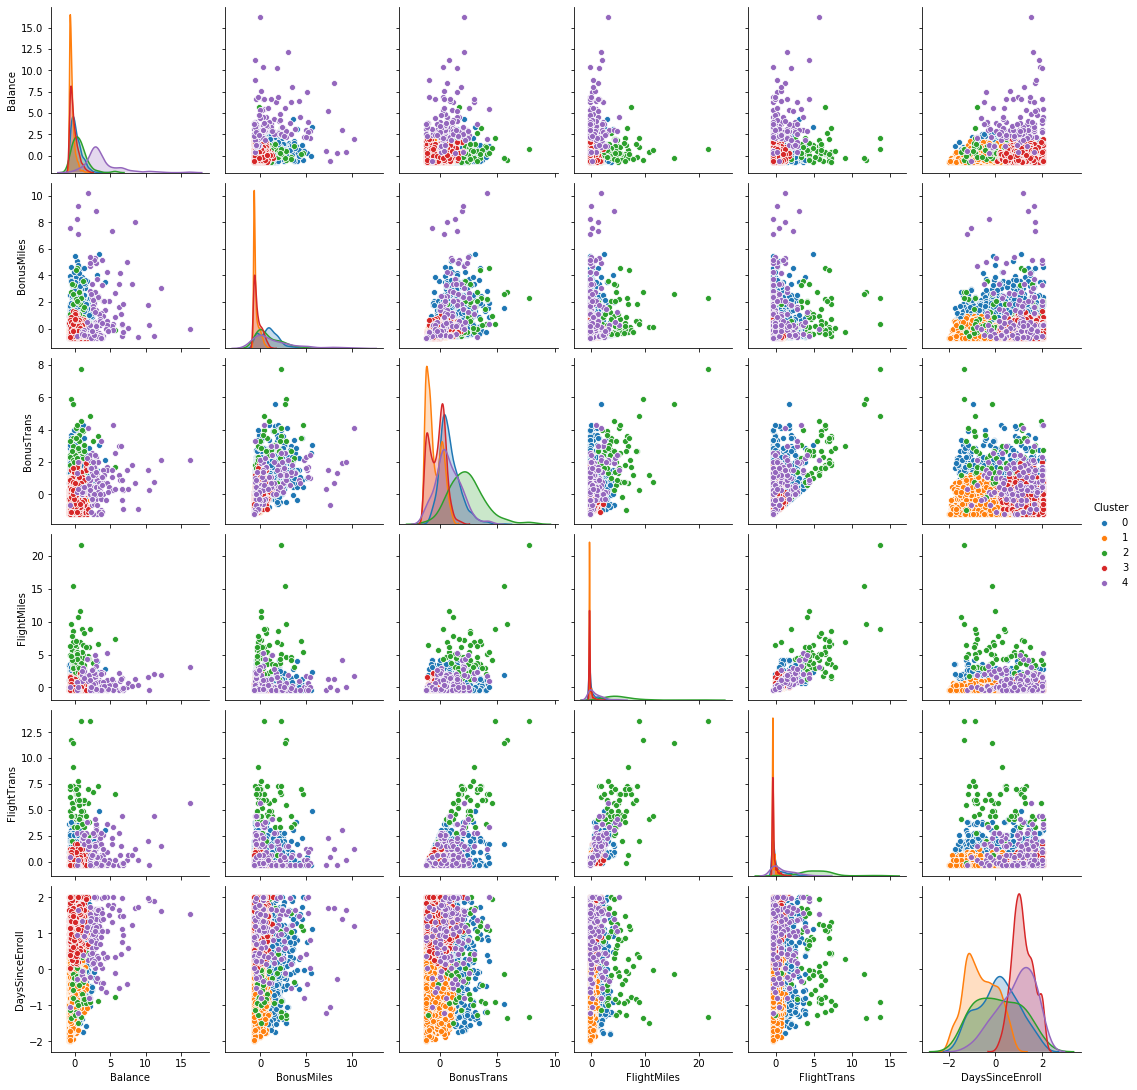

In [31]:
import seaborn as sns

sns.pairplot(new_airline_scaled, hue='Cluster')
plt.show()

# ------------------------------------------------------------------------------------------

## EXTRA

In [32]:
# from scipy.cluster.hierarchy import fcluster, linkage

# # generate the linkage matrix
# Z = linkage(airline_scaled, 'ward')
# max_d = 0
# clusters = fcluster(Z, max_d, criterion='distance')
# clusters

In [33]:
# height = []
# for d in range(0, 100):
#     agglomerative = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward',
#                                             distance_threshold=d, compute_distances=True)
#     agglomerative.fit(airline_scaled)
#     height.append(agglomerative.distances_)